# Projeto I - Modelagem Matemática em Finanças I - 2019
> Grupo: Gil Miranda e João Victor Fonseca<br>
> Contato: gilsmneto@gmail.com<br>
> Repo: [@mirandagil](https://github.com/mirandagil/university-courses/analise-numerica-edo-2019-1)<br>
> Fontes bibliográficas:
* Rosa, R. (2017). <i>Equações Diferenciais</i>.
* Trefethen, L. & Bau, D. (1997) <i>Numerical Linear Algebra</i>. SIAM
* Keith R. Symon (1988) <i>Mecânica</i>. CAMPUS

   
`last update: 06/04/2019`

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
## Função para simular os valores da ação dados os parametros
def binomial(S0, T, dt, u, d, p):
    Si = S0
    S = []
    t = np.arange(0,T,dt)
    for ti in t:
        rnd = np.random.rand()
        if rnd < p:
            Si *= u
        else:
            Si *= p
        S.append(Si)
    return S

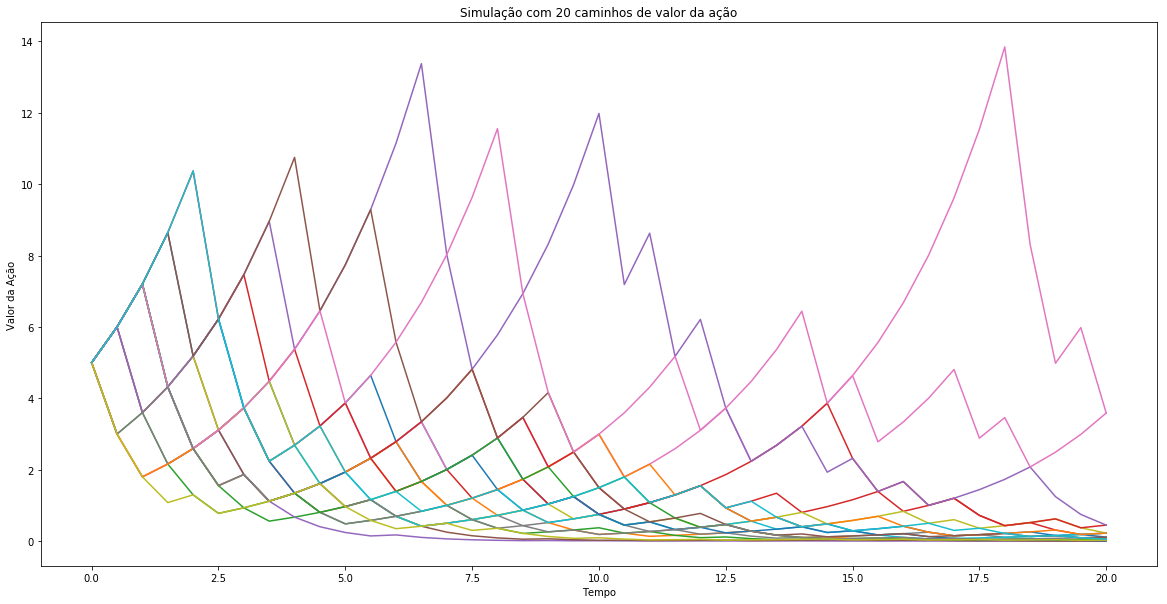

In [25]:
## Definição dos parametros
T = 20
dt = 0.5
S0 = 5
u = 1.2
d = 0.8
p = 0.6

## Construção da lista de valores da ação pelo tempo
x = [binomial(S0, T, dt, u, d, p) for i in range(0,20)]

## Inserir o valor inicial em cada lista
for i in range(0,20):
    x[i].insert(0,S0)
    
## Discretização do tempo
ts = np.linspace(0,20,41)

## Plot do gráfico
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.plot(ts,x[i])
plt.title('Simulação com 20 caminhos de valor da ação')
plt.xlabel('Tempo')
plt.ylabel('Valor da Ação')
plt.show()

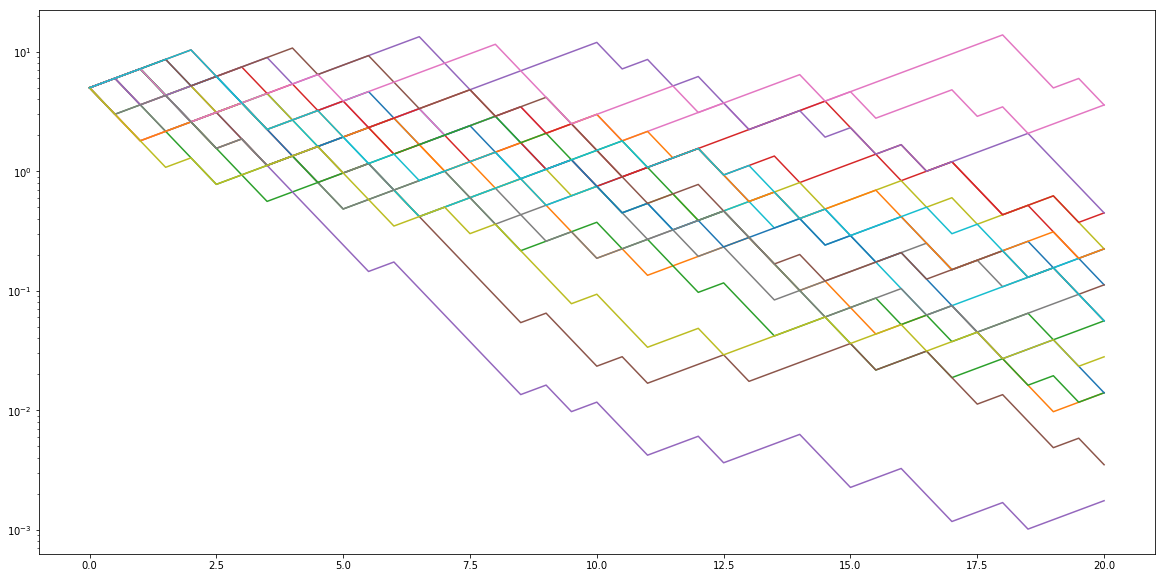

In [28]:
## Plot com escala log
plt.figure(figsize=(20,10))
for i in range(0,20):
    plt.semilogy(ts,x[i])
plt.show()

## Boxplot

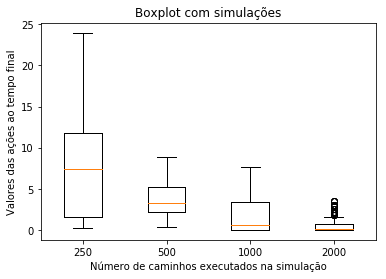

In [130]:
vs = []
med_1 = []

for j in [250,500,1000,2000]:
    vs.append([binomial(S0, T, dt, u, d, p) for i in range(0,j)])
vf = [i[-1] for i in vs]

for i in range(4):
    med_1.append(np.mean(vs[i]))

for v in vf:
    plt.boxplot(vf)
plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

## Modificando os parâmetros

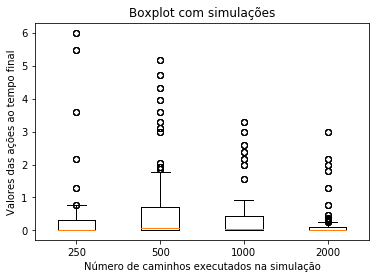

In [131]:
u_n = np.sqrt(u)
d_n = np.sqrt(d)
dt_n = dt/2

vs = []
med_2 = []
for j in [250,500,1000,2000]:
    vs.append([binomial(S0, T, dt_n, u_n, d_n, p) for i in range(0,j)])
vf = [i[-1] for i in vs]

for i in range(4):
    med_2.append(np.mean(vs[i]))

for v in vf:
    plt.boxplot(vf)
plt.title('Boxplot com simulações')
plt.ylabel('Valores das ações ao tempo final')
plt.xlabel('Número de caminhos executados na simulação')
plt.xticks([1,2,3,4],[250,500,1000,2000])
plt.show()

In [132]:
med_1,med_2

([2.3451014005737956,
  2.3297963548267258,
  2.4287152393896685,
  2.480820315986415],
 [0.5610092494179435,
  0.5303407356030281,
  0.5280963374957959,
  0.5584470179348291])

In [ ]:
def Esperanca(x):